In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Zadanie 1 - sumowanie liczb pojedynczej precyzji

1. Napisz program, który oblicza sumę N liczb pojedynczej precyzji przechowywanych
w tablicy o N = $10^7$
elementach. Tablica wypełniona jest tą samą wartością v z
przedziału [0.1, 0.9] np. v = 0.53125.


In [2]:
N = 10 ** 7
v = 0.00001
v_32 = np.float32(v)
expected = v * N

T = [v_32 for _ in range(N)]

In [3]:
def naive_sum(T):
    result = np.float32(0)

    for i in range(len(T)):
        result += T[i]

    return result

2. Wyznacz bezwzględny i względny błąd obliczeń. Dlaczego błąd względny jest tak
duży?

In [4]:
def relative_error(result, expected):
    return abs(result - expected) / expected

In [5]:
def absolute_error(result, expected):
    return abs(result - expected)

In [6]:
result = naive_sum(T)

In [7]:
print(f'''
    Calculated value: {result},
    Expected value: {expected},
    Relative error: {relative_error(result, expected)},
    Absolute error: {absolute_error(result, expected)}''')


    Calculated value: 93.66509246826172,
    Expected value: 100.00000000000001,
    Relative error: 0.06334907531738294,
    Absolute error: 6.3349075317382955


In [8]:
def naive_sum_with_error_logs(T, logs = [], step = 10**6):
    result = np.float32(0)
    v = np.float64(T[0])

    for i in range(len(T) // step):
        for j in range(i * step, (i + 1) * step):
            result += T[j]
        expected = (i + 1) * step * v
        logs.append(((i + 1) * step, relative_error(result, expected)))
    
    return logs

3. W jaki sposób rośnie błąd względny w trakcie sumowania? Przedstaw wykres (raportuj wartość błędu co 25000 kroków) i dokonaj jego interpretacji.


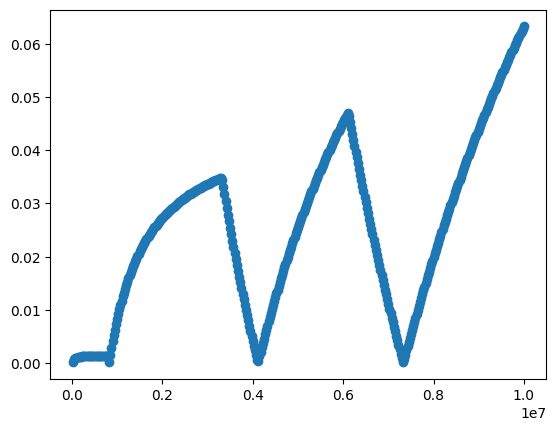

In [9]:
logs = naive_sum_with_error_logs(T, [], 25000)
x, y = zip(*logs)

plt.scatter(x, y)
plt.show()

4. Zaimplementuj rekurencyjny algorytm sumowania, działający jak na rysunku poniżej.


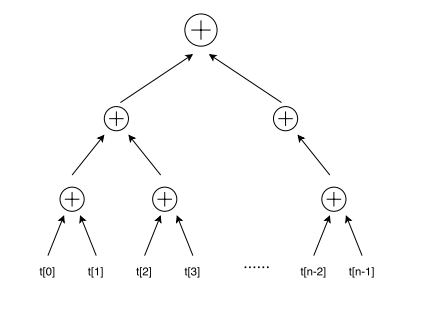


In [10]:
def rec_sum(T):
    i = 0
    j = len(T) - 1

    def rec_sum_function(T, i, j):
        if j == i:
            return T[i]
        else:
            m = (i + j) // 2
            return rec_sum_function(T, i, m) + rec_sum_function(T, m + 1, j)

    return rec_sum_function(T, i, j)


In [11]:
rec_result = rec_sum(T)

5. Wyznacz bezwzględny i względny błąd obliczeń. Dlaczego błąd względny znacznie
zmalał?

In [12]:
print(f'''
    Calculated value: {rec_result},
    Expected value: {expected},
    Relative error: {relative_error(rec_result, expected)},
    Absolute error: {absolute_error(rec_result, expected)}''')


    Calculated value: 100.0,
    Expected value: 100.00000000000001,
    Relative error: 1.4210854715202002e-16,
    Absolute error: 1.4210854715202004e-14


6. Porównaj czas działania obu algorytmów dla tych samych danych wejściowych.

In [13]:
time_stamp1 = time.time()
naive_result = naive_sum(T)
time_stamp2 = time.time()
rec_result = rec_sum(T)
time_stamp3 = time.time()

In [14]:
print(f'''
    Naive time: {time_stamp2 - time_stamp1},
    Recursive time: {time_stamp3 - time_stamp2}
''')


    Naive time: 2.8959789276123047,
    Recursive time: 6.227375507354736



7. Przedstaw przykładowe dane wejściowe, dla których algorytm sumowania rekurencyjnego zwraca niezerowy błąd.

## Zadanie 2 - algorym Kahana

Zaimplementuj algorytm sumowania Kahana.

```c
    float sum = 0.0f;
    float err = 0.0f;
    for (int i = 0; i < tab.length; ++i) {
        float y = tab[i] - err;
        float temp = sum + y;
        err = (temp - sum) - y;
        sum = temp;
    }
```

In [15]:
def kahan_sum(T):
    result = np.float32(0)
    err = np.float32(0)

    for i in range(len(T)):
        y = T[i] - err
        tmp = result + y
        err = tmp - result - y
        result = tmp

    return result

1. Wyznacz bezwzględny i względny błąd obliczeń dla tych samych danych wejściowych jak w przypadku testów z Zadania 1.

In [16]:
kahan_result = kahan_sum(T)

In [17]:
print(f'''
    Calculated value: {kahan_result},
    Expected value: {expected},
    Relative error: {relative_error(kahan_result, expected)},
    Absolute error: {absolute_error(kahan_result, expected)}''')


    Calculated value: 100.0,
    Expected value: 100.00000000000001,
    Relative error: 1.4210854715202002e-16,
    Absolute error: 1.4210854715202004e-14


2. Wyjaśnij dlaczego w algorytm Kahana ma znacznie lepsze własności numeryczne?
Do czego służy zmienna err?

3. Porównaj czasy działania algorytmu Kahana oraz algorytmu sumowania rekurencyjnego dla tych samych danych wejściowych.

In [18]:
time_stamp1 = time.time()
naive_result = naive_sum(T)
time_stamp2 = time.time()
rec_result = rec_sum(T)
time_stamp3 = time.time()
kahan_result = kahan_sum(T)
time_stamp4 = time.time()

In [19]:
print(f'''
    Naive time: {time_stamp2 - time_stamp1},
    Recursive time: {time_stamp3 - time_stamp2},
    Kahan time: {time_stamp4 - time_stamp3}
''')


    Naive time: 2.1195971965789795,
    Recursive time: 6.5240209102630615,
    Kahan time: 6.9466564655303955



## Zadanie 3 - sumy częściowe

Rozważ sumy częściowe szeregu definiującego funkcję dzeta Riemanna: 

$\zeta(n, s) = \sum\limits_{k = 1}^n \frac{1}{k^s}$

oraz funkcję eta Dirichleta:

$\eta(n, s) = \sum\limits_{k = 1}^n (-1)^{k-1}\frac{1}{k^s}$

1. Dla s = 2, 3.6667, 5, 7.2, 10 oraz n = 50, 100, 200, 500, 1000 oblicz wartości funkcji ζ(s)
i η(s) w pojedynczej precyzji sumując w przód, a następnie wstecz. Porównaj wyniki
z rezultatami uzyskanymi dla podwójnej precyzji. Dokonaj interpretacji otrzymanych
wyników.


In [20]:
def riemann_zeta_function_single_precision(s, n):
    result_forward = np.float32(0)
    result_backward = np.float32(0)

    for k in range(1, n + 1):
        result_forward += np.float32(k ** (-s))

    for k in range(n + 1, 0, -1):
        result_backward += np.float32(k ** (-s))
    
    return result_forward, result_backward

In [21]:
def riemann_zeta_function_double_precision(s, n):
    result_forward = np.float64(0)
    result_backward = np.float64(0)

    for k in range(1, n + 1):
        result_forward += np.float64(k ** (-s))

    for k in range(n + 1, 0, -1):
        result_backward += np.float64(k ** (-s))
    
    return result_forward, result_backward

In [22]:
s_values = [2, 3.6667, 5, 7.2, 10]
n_values = [50, 100, 200, 500, 1000]

In [23]:
for s in s_values:
    for n in n_values:
        print(f'''s, n : {s, n}
Riemann zeta function - single precision (forward, backward): {riemann_zeta_function_single_precision(s, n)},
Riemann zeta function - double precision (forward, backward): {riemann_zeta_function_double_precision(s, n)}
        ''')

s, n : (2, 50)
Riemann zeta function - single precision (forward, backward): (1.6251329, 1.6255171),
Riemann zeta function - double precision (forward, backward): (1.625132733621529, 1.6255172011340244)
        
s, n : (2, 100)
Riemann zeta function - single precision (forward, backward): (1.634984, 1.6350819),
Riemann zeta function - double precision (forward, backward): (1.6349839001848923, 1.6350819297898336)
        
s, n : (2, 200)
Riemann zeta function - single precision (forward, backward): (1.6399467, 1.6399713),
Riemann zeta function - double precision (forward, backward): (1.6399465460149971, 1.639971297877575)
        
s, n : (2, 500)
Riemann zeta function - single precision (forward, backward): (1.642936, 1.64294),
Riemann zeta function - double precision (forward, backward): (1.642936065514894, 1.6429400495627664)
        
s, n : (2, 1000)
Riemann zeta function - single precision (forward, backward): (1.6439348, 1.6439356),
Riemann zeta function - double precision (forward

In [24]:
def dirichlet_eta_function_single_precision(s, n):
    result_forward = np.float32(0)
    result_backward = np.float32(0)

    for k in range(1, n + 1):
        result_forward += np.float32( (-1) ** (k - 1) * k ** (-s))
    
    for k in range(n + 1, 0, -1):
        result_backward += np.float32( (-1) ** (k - 1) * k ** (-s))

    return result_forward, result_backward

In [25]:
def dirichlet_eta_function_double_precision(s, n):
    result_forward = np.float64(0)
    result_backward = np.float64(0)

    for k in range(1, n + 1):
        result_forward += np.float64( (-1) ** (k - 1) * k ** (-s))
    
    for k in range(n + 1, 0, -1):
        result_backward += np.float64( (-1) ** (k - 1) * k ** (-s))

    return result_forward, result_backward

In [26]:
for s in s_values:
    for n in n_values:
        print(f'''s, n : {s, n}
Dirichlet eta function - single precision (forward, backward): {dirichlet_eta_function_single_precision(s, n)},
Dirichlet eta function - double precision (forward, backward): {dirichlet_eta_function_double_precision(s, n)}
        ''')

s, n : (2, 50)
Dirichlet eta function - single precision (forward, backward): (0.822271, 0.8226555),
Dirichlet eta function - double precision (forward, backward): (0.8222710318260295, 0.822655499338524)
        
s, n : (2, 100)
Dirichlet eta function - single precision (forward, backward): (0.8224175, 0.82251555),
Dirichlet eta function - double precision (forward, backward): (0.8224175333741286, 0.8225155629790689)
        
s, n : (2, 200)
Dirichlet eta function - single precision (forward, backward): (0.8224547, 0.82247937),
Dirichlet eta function - double precision (forward, backward): (0.822454595922551, 0.8224793477851284)
        
s, n : (2, 500)
Dirichlet eta function - single precision (forward, backward): (0.82246536, 0.822469),
Dirichlet eta function - double precision (forward, backward): (0.8224650374240963, 0.8224690214719695)
        
s, n : (2, 1000)
Dirichlet eta function - single precision (forward, backward): (0.82246685, 0.82246757),
Dirichlet eta function - double 

## Zadanie 4 - błędy zaokrągleń i odwzorowanie logistyczne (dodatkowe)

Rozważ odwzorowanie logistyczne dane następującym wzorem rekurencyjnym: 

$x_{n+1} = rx_{n}(1 - x_{n})$

Przy czym $0 \le x_n \le 1, r \gt 0$. Zbadaj zbieżność procesu iteracyjnego określonego tym
równaniem w zależności od wartości parametru $r$ oraz $x_0$.

In [27]:
def logistic_mapping_double_precision(r, x0, e = 10**-5, max_steps = 10**2):
    xs = []
    x = x0
    y = r * x * (1 - x)
    z = r * y * (1 - y)

    while max_steps > 0:
        xs.append(y)
        x = y
        y = z
        z = r * y * (1 - y)

        max_steps -= 1
    
    return xs

1. Dla różnych wartości $r$ $(1 \le r \le 4)$ oraz kilku wybranych wartości $x_0$ przedstaw
na wykresie wartości $x_n$ uzyskane po wielu iteracjach odwzorowania logistycznego
(diagram bifurkacyjny). Dokonaj interpretacji otrzymanych wyników.

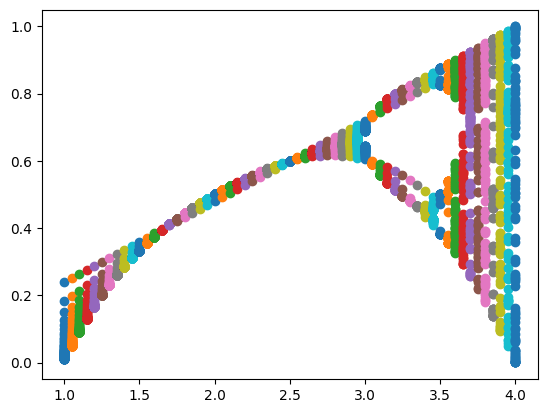

In [28]:
r = 1
step = 0.05
x0 = 0.6

while r <= 4:
    xs = logistic_mapping_double_precision(r, x0)

    plt.scatter([r] * len(xs), xs)

    r += step

2. Dla tych samych wartości $x_0$ oraz $r$ $(3.75 \le r \le 3.8)$ porównaj trajektorie obliczone
z użyciem pojedynczej i podwójnej precyzji. Wyjaśnij otrzymane wyniki.

In [29]:
def logistic_mapping_single_precision(r, x0, e = 10**-5, max_steps = 10**2):
    xs = []
    k = np.float32(r)
    x = np.float32(x0)
    y = np.float32(k * x * (1 - x))
    z = k * y * (1 - y)

    while max_steps > 0:
        xs.append(y)
        x = y
        y = z
        z = k * y * (1 - y)

        max_steps -= 1
    
    return xs

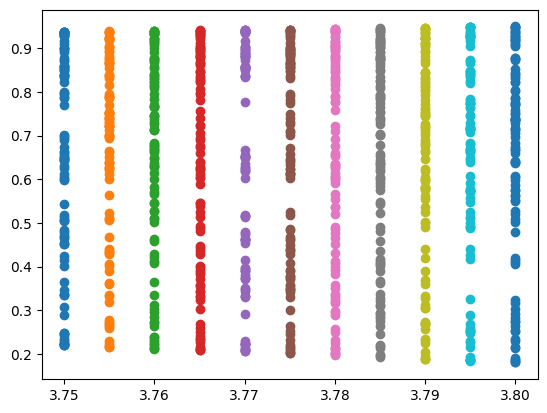

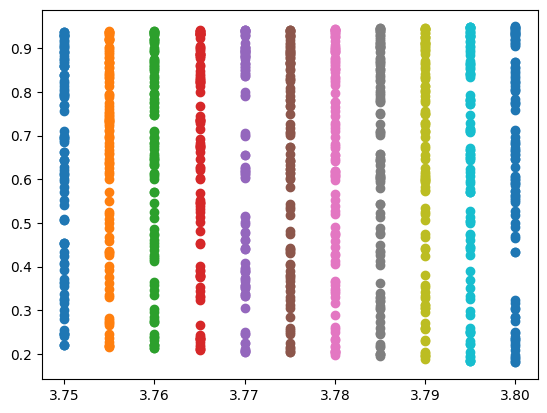

In [41]:
r = 3.75
step = 0.005
x0 = 0.2

while r <= 3.8:
    xs = logistic_mapping_single_precision(r, x0)

    plt.scatter([r] * len(xs), xs)

    r += step

plt.show()
plt.clf()

r = 3.75

while r <= 3.8:
    xs = logistic_mapping_double_precision(r, x0)

    plt.scatter([r] * len(xs), xs)

    r += step

3. Dla $r = 4$ i różnych wartości $x_0$ wyznacz (pojedyncza precyzja) liczbę iteracji
potrzebnych do osiągnięcia zera. Przedstaw interpretację rezultatów.


In [51]:
def logistic_mapping_iterations_to_zero(r, x0, e = 10**-12):
    k = np.float32(r)
    x = np.float32(x0)
    y = np.float32(k * x * (1 - x))
    count = 1

    while abs(y) >= e:
        xs.append(y)
        x = y
        y = k * x * (1 - x)

        count += 1

    return count


In [52]:
r = 4
x0 = 0.2

logistic_mapping_iterations_to_zero(4, x0)

387624